# Financial Planning with APIs and Simulations

This Financial Analysis tool helps the members of Credit Union by providing the following two functionalities

1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.


In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file

load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.

btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18922600,
            "id": 1,
            "last_updated": 1641581791,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 786841626847,
                    "percent_change_1h": -0.867272009909812,
                    "percent_change_24h": -4.30396769921598,
                    "percent_change_7d": -11.7295916771507,
                    "percentage_change_1h": -0.867272009909812,
                    "percentage_change_24h": -4.30396769921598,
                    "percentage_change_7d": -11.7295916771507,
                    "price": 41656.0,
                    "volume_24h": 77866570095
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18922600,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [19]:
# Using the Python requests library, make an API call to access the current price ETH

eth_response = requests.get(eth_url).json()
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119064785,
            "id": 1027,
            "last_updated": 1641583389,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 376389188828,
                    "percent_change_1h": -0.989081712302194,
                    "percent_change_24h": -8.5198153362823,
                    "percent_change_7d": -14.8993900919086,
                    "percentage_change_1h": -0.989081712302194,
                    "percentage_change_24h": -8.5198153362823,
                    "percentage_change_7d": -14.8993900919086,
                    "price": 3161.44,
                    "volume_24h": 24020133577
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119064785,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

In [21]:
# Navigating the BTC response object to access the current price of BTC

btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
print(f"\nThe current market price of bitcoin is : ${btc_price}")


The current market price of bitcoin is : $41656.0


In [22]:
# Navigating the ETH response object to access the current price of ETH

eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
print(f"\nThe current market price of  is Ethereum: ${eth_price}")


The current market price of  is Ethereum: $3161.44


In [23]:
# Computing the current value of the BTC holding and printing it.

btc_value = btc_coins * btc_price
print(f"\nThe current BTC Holding value in your wallet is: ${btc_value}")


The current BTC Holding value in your wallet is: $49987.2


In [24]:
# Computing the current value of the ETH holding and printing it.

eth_value = eth_coins * eth_price
print(f"\nThe current ETH Holding value in your wallet is: ${eth_value}")


The current ETH Holding value in your wallet is: $16755.632


In [25]:
# Computing the total value of the cryptocurrency wallet and printing it

total_crypto_wallet = btc_value + eth_value
print(f"\nThe Holding value in your cryptocurrency wallet is: ${total_crypto_wallet}")



The Holding value in your cryptocurrency wallet is: $66742.832


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, we’ll determine the current value of a member’s stock and bond holdings. we’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. 

1. An environment file (`.env`) is created to store the values of Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, the Alpaca `tradeapi.REST` object is created.

3. The following parameter for the API call is set:

    - `tickers`: tickers for the member’s stock and bond holdings("SPY", "AGG").

    - `timeframe`: A time frame of one day("1D").

    - `start_date` and `end_date`: Set to "2022-01-06" to get the most recent closing price.

4. we get the closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. The Response is formatted as Pandas Dataframe.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [26]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


In [28]:
# variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Alpaca tradeapi.REST object creation
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [63]:
# set tickers, timeframe start and end date.
tickers = ["SPY", "AGG"]
timeframe = "1D"
start_date = pd.Timestamp("2022-01-06" , tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-06" , tz="America/New_York").isoformat()

In [65]:
# Get most recent closing prices for SPY and AGG
portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
portfolio_df

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2022-01-06 00:00:00-05:00  112.75  112.84  112.66  112.81  6812819  467.89   

                                                             
                             high     low   close    volume  
time                                                         
2022-01-06 00:00:00-05:00  470.82  465.43  467.93  78577470

In [68]:
# Navigate portfolio_df and get AGG closing price
agg_close_price = float(portfolio_df["AGG"]["close"])
agg_close_price

112.81

In [36]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

start_date = pd.Timestamp("2022-01-06", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-06", tz="America/New_York").isoformat()


In [35]:
# (pd.to_datetime("today") - pd.DateOffset(days=1)).

Timestamp('2022-01-06 12:23:08.140049')

In [37]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Review the first 5 rows of the Alpaca DataFrame


portfolio_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2022-01-06 00:00:00-05:00  112.75  112.84  112.66  112.81  6812819  467.89   

                                                             
                             high     low   close    volume  
time                                                         
2022-01-06 00:00:00-05:00  470.82  465.43  467.93  78577470

In [41]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = portfolio_df["AGG"]["close"]

print(f"\nThe AGG closing price on {start_date} is \n{agg_close_price}")


The AGG closing price on 2022-01-06T00:00:00-05:00 is 
time
2022-01-06 00:00:00-05:00    112.81
Name: close, dtype: float64


In [42]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = portfolio_df["SPY"]["close"]

print(f"\nThe SPY closing price on {start_date} is \n{spy_close_price}")


The SPY closing price on 2022-01-06T00:00:00-05:00 is 
time
2022-01-06 00:00:00-05:00    467.93
Name: close, dtype: float64


In [69]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
agg_value

22562.0

In [70]:
# Navigate portfolio_df and get SPY closing price
spy_close_price = float(portfolio_df["SPY"]["close"])
spy_close_price

467.93

In [71]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
spy_value

51472.3

In [72]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value 

# Print the current balance of the stock and bond portion of the portfolio
print(f"\nThe Holding value in your Stocks and Bonds Portfolio wallet is: \n${total_stocks_bonds}\n")


The Holding value in your Stocks and Bonds Portfolio wallet is: 
$74034.3



## Calculate Total Value of Portfolio

In [79]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds

total_portfolio = total_crypto_wallet + total_stocks_bonds

total_portfolio
print(f"\nTotal Portfolio Value is (cryto wallet + stocks + bonds) : \n${total_portfolio:.2f}\n")


Total Portfolio Value is (cryto wallet + stocks + bonds) : 
$140777.13



### Evaluate the Emergency Fund

We’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. 

1. A Python list named `savings_data`  is created that contains the total value of the cryptocurrency wallets and total value of the stock and bond portions of the portfolio.

2. The `savings_data` list is used to create a Pandas DataFrame named `savings_df` with the following three parameters:

    - `savings_data`: The list that holds valuations od cryptocurry wallet and stocks/bonds portfolio.

    - `columns`: We set this as `amount`.

    - `index`: We set this to a Python list with the values of `crypto` and `stock/bond`.

3. Using `savings_df` DataFrame we plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`.

4. We determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income.

    1. A variable named `emergency_fund_value` is created and set to three times the value of the member’s `monthly_income` of $12000.

    2. We use a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, a message congratulating the member for having enough money in this fund is displayed.

        2. Else if the total portfolio value is equal to the emergency fund value, a message congratulating the member on reaching this important financial goal is displayed.

        3. Else the total portfolio is less than the emergency fund value, a message showing how many dollars away the member is from reaching the goal is displayed.


In [104]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet,total_stocks_bonds]


print("\nThe portfolio saving data value is :")
savings_data
    


The portfolio saving data value is :


[66742.832, 74034.3]

####  A Pandas DataFrame named `savings_df` is created using `savings_data` list 

In [103]:
savings_df = pd.DataFrame(savings_data,
                         columns=["amount"],
                         index=["crypto","stock/bond"])

print("\nSavings Dataframe : ")
savings_df



Savings Dataframe : 


,amount
crypto,66742.832
stock/bond,74034.300


#### Pie Chart plot of the savings Dataframe

<AxesSubplot:title={'center':'Crppto and Stock/Bond pie chart for the Portfolio'}, ylabel='amount'>

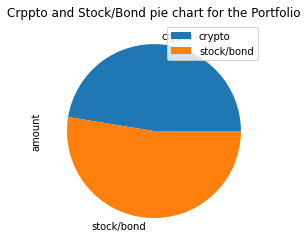

In [102]:
savings_df.plot.pie(title="Crppto and Stock/Bond pie chart for the Portfolio",
                   y="amount",
                   )

#### Determining if the current portfolio has enough to create an emergency fund as part of the member’s financial plan

In [105]:
# A variable named emergency_fund_value is created.

emergency_fund_value = 3 * monthly_income

In [107]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if total_portfolio > emergency_fund_value:
    print("\nCongratulations! You have enough funds in your portfolio for emergencies")
elif total_portfolio == emergency_fund_value:
    print("\nCongratulations! You just met the goal of having enough emergency fund in your Portfolio")
else:
    print(f"\nYour Portfolio does not have enough emergency fund. You still need ${emergency_fund_value - total_portfolio} to meet your emergency fund goal.")



Congratulations! You have enough funds in your portfolio for emergencies


## Part 2: Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, we’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. The steps are:

1. An API call via the Alpaca SDK is made to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. We run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and the results are plottted.

3. We plot the probability distribution of the Monte Carlo simulation.

4. We generate the summary statistics for the Monte Carlo simulation.



#### API call to the Alpaca SDK to get 3 years of historical closing prices for SPY and AGG.

In [108]:
# start_date is set to 3 years back from your current date(end_date)
# We use the end_date as "2022-01-06" which was set in part-1.

start_date = start_date = pd.Timestamp("2019-01-06" , tz="America/New_York").isoformat()

# the maximum amount of rows
limit_rows =1000

In [138]:
# The Alpaca get_barset function is used to get the 3 years worth of pricing data
# The tickers and timeframe parameters have been set in Part 1 of this activity 
# - tickers = ["AGG", "SPY"]
# - timeframe = "1D"

portfolio_3_year_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df


# Displaying both the first and last five rows of the DataFrame
display(portfolio_3_year_prices_df.head())
display(portfolio_3_year_prices_df.tail())


AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2019-01-07 00:00:00-05:00  106.72  106.79  106.46  106.470  6545877.0  252.69   
2019-01-08 00:00:00-05:00  106.40  106.53  105.53  106.420  3818241.0  256.82   
2019-01-09 00:00:00-05:00  106.42  106.57  105.95  106.480  5163839.0  257.56   
2019-01-10 00:00:00-05:00  106.52  106.56  106.33  106.385  3441214.0  256.26   
2019-01-11 00:00:00-05:00  106.58  106.66  106.50  106.560  5638395.0  257.68   

                                                               
                               high     low   close    volume  
time                                                           
2019-01-07 00:00:00-05:00  255.9500  251.69  254.40  88317608  
2019-01-08 00:00:00-05:00  257.3100  254.00  256.65  88864452  
2019-01-09 00:00:00-05:00  258.9100  241.40  257.71  77555720  
2019-01-10 00:00:00-05:00  259.1600  255.50  258.94  85909797  
2019-01-11 00:00:00-05:00  259.0098  257.03  258.76  60544770

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2021-12-31 00:00:00-05:00  114.15  114.3100  114.060  114.09  6557778.0   
2022-01-03 00:00:00-05:00  113.67  113.6753  113.310  113.31  8906643.0   
2022-01-04 00:00:00-05:00  113.22  113.3000  113.075  113.29  7615698.0   
2022-01-05 00:00:00-05:00  113.34  113.3600  112.900  112.93  7686662.0   
2022-01-06 00:00:00-05:00  112.75  112.8400  112.660  112.81  6812819.0   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2021-12-31 00:00:00-05:00  475.64  476.86  474.6700  474.89  51212452  
2022-01-03 00:00:00-05:00  476.32  477.85  473.8500  477.76  56128214  
2022-01-04 00:00:00-05:00  479.22  479.98  475.5800  477.51  59093344  
2022-01-05 00:00:00-05:00  477.16  477.98  468.2801  468.38  87411658  
2022-01-06 00:00:00-05:00  467.89  470.82  465.4300  467.93  78577470

####  Monte Carlo simulation run.

In [139]:
# The Monte Carlo simulation is configured to forecast 30 years cumulative returns
# The weights split are 40% to AGG and 60% to SPY.
# We run 500 samples.

MC_30_Year_Simulation = MCSimulation(
    portfolio_data = portfolio_3_year_prices_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

# The simulation input data
MC_30_Year_Simulation.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2019-01-07 00:00:00-05:00  106.72  106.79  106.46  106.470  6545877.0   
2019-01-08 00:00:00-05:00  106.40  106.53  105.53  106.420  3818241.0   
2019-01-09 00:00:00-05:00  106.42  106.57  105.95  106.480  5163839.0   
2019-01-10 00:00:00-05:00  106.52  106.56  106.33  106.385  3441214.0   
2019-01-11 00:00:00-05:00  106.58  106.66  106.50  106.560  5638395.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2019-01-07 00:00:00-05:00          NaN  252.69  255.9500  251.69  254.40   
2019-01-08 00:00:00-05:00    -0.000470  256.82  257.3100  254.00  256.65   
2019-01-09 00:00:00-05:00     0.000564  257.56  258.9100  241.40  257.71   
2019-01-10 00:00:00-05:00    -0.000892  256.26  259.1600  255.50  258.94   
2019-01-11 00:00:00-05:00     0.001645  257.68  259.0098  257.03  258.76   

                                                  
                             volume daily_return  
time                                              
2019-01-07 00:00:00-05:00  88317608          NaN  
2019-01-08 00:00:00-05:00  88864452     0.008844  
2019-01-09 00:00:00-05:00  77555720     0.004130  
2019-01-10 00:00:00-05:00  85909797     0.004773  
2019-01-11 00:00:00-05:00  60544770    -0.000695

In [140]:
# Monte Carlo simulation to forecast 30 years cumulative returns

MC_30_Year_Simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/rupika/bootcamp/FinTech_Workspace/Week5/module_5_challenge/Plan_Your_Finance/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997447,0.993584,0.984785,0.998505,0.987182,0.995633,1.017714,1.027063,1.005765,0.996339,...,0.995583,0.994502,1.004296,0.989801,1.002496,1.014051,1.001213,0.989123,0.996643,1.009838
2,1.001577,0.982502,0.984848,0.990417,0.996580,0.988969,1.028657,1.023020,0.999679,0.983186,...,0.999901,0.995033,1.020625,1.001852,0.999504,1.002524,0.993356,0.979843,0.998005,1.010106
3,1.000363,0.968751,0.987475,0.988532,0.995297,0.991199,1.014240,1.026952,0.999357,0.993888,...,0.999932,0.986677,1.031715,0.997447,1.009807,1.007135,0.999201,0.975423,1.012345,1.010915
4,0.984675,0.977270,0.978256,0.987832,1.008826,0.992770,1.008616,1.029781,1.005481,0.995568,...,1.007870,0.989228,1.033683,0.997288,1.025652,0.997800,0.997498,0.975454,1.021136,1.003400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,199.354152,56.728057,25.877393,40.203029,82.510634,63.575683,26.511496,75.318816,29.463421,76.375117,...,93.698771,129.902460,71.729199,30.536380,36.186285,33.204130,39.853742,68.877892,60.119835,24.221575
7557,198.608634,56.667753,26.182507,40.094727,82.501704,63.928252,26.445872,74.017341,29.300903,76.597919,...,93.297623,130.527095,71.141411,30.631340,36.483216,33.469080,40.169434,69.618449,59.443662,24.162357
7558,200.400063,56.532607,26.045514,40.499637,82.569081,65.070499,26.293980,74.672971,29.217009,77.490157,...,92.612681,130.845138,71.660230,30.453138,36.172973,33.534237,40.184809,69.277402,59.470529,24.685726
7559,200.625060,56.440629,25.916224,40.463785,83.091252,64.636892,26.341083,74.527337,29.746043,77.919612,...,92.146478,131.566297,71.417758,30.057904,36.260400,33.532168,40.125691,68.490215,59.535005,24.518204


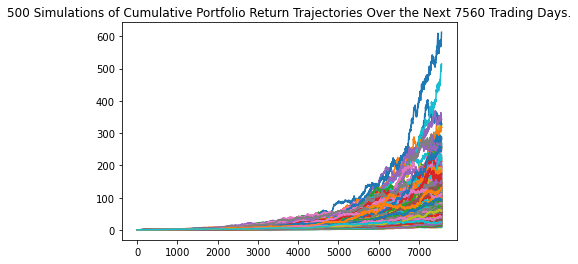

In [141]:
# 30-year Monte Carlo simulation Visualization by overlay line plot

MC_30year_sim_line_plot = MC_30_Year_Simulation.plot_simulation()

#### Probability distribution Plot of the Monte Carlo simulation.

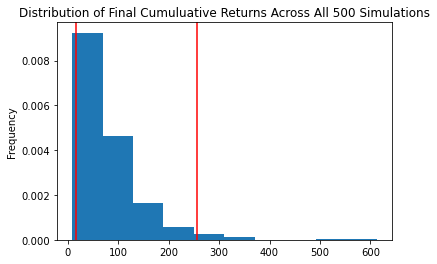

In [142]:
# Probability distribution Plot 30-year Monte Carlo simulation by plotting histogram.

MC_30year_sim_dist_plot = MC_30_Year_Simulation.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [131]:
# Summary statistics from the 30-year Monte Carlo simulation results

MC_30year_summary_statistics = MC_30_Year_Simulation.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_30year_summary_statistics)

count           500.000000
mean             80.802058
std              75.263122
min               7.271886
25%              35.704537
50%              62.728271
75%              97.445896
max             808.271408
95% CI Lower     15.416758
95% CI Upper    266.954163
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that was generated from the Monte Carlo simulation

**Question :**
-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [146]:
# The current balance of the stock and bond portion of the members portfolio

print(f"\nThe current balance of the Stock and Bond Portion of the members portfolio is : ${total_stocks_bonds}\n")


The current balance of the Stock and Bond Portion of the members portfolio is : $74034.3



In [149]:
# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_30year_summary_statistics["95% CI Lower"] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_30year_summary_statistics["95% CI Upper"] * total_stocks_bonds

# Print the result of your calculations
print(f"\nAnswer:")
print(f"\nThere is a 95% chance that the  incurrent value of ${total_stocks_bonds} \nin the portfolio"
  f" over the next 30 years \nwill end within in the range of"
  f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")



Answer:

There is a 95% chance that the  incurrent value of $74034.3 
in the portfolio over the next 30 years 
will end within in the range of $ 1141368.85 and $ 19763764.57.


### Cumulative Returns Forecast for 10 Years

The next objective is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow the member to retire earlier.

Below steps are folowed for this new Monte Carlo simulation: 

- Cumulative returns for 10 years from now is forecasted. To accumulate wealth for retirement in shortened investment horizon(compared to 30 years), the portfolio need to invest heavily in the riskier asset(that is, stock)

- The weights of the retirement portfolio is adjusted so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- We run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.


In [151]:
# Monte Carlo simulation to forecast 10 years cumulative returns.
# The weights is split 20% to AGG and 80% to SPY.

MC_10_Year_Simulation = MCSimulation(
    portfolio_data = portfolio_3_year_prices_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252 * 10
)
# The simulation input data
MC_10_Year_Simulation.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2019-01-07 00:00:00-05:00  106.72  106.79  106.46  106.470  6545877.0   
2019-01-08 00:00:00-05:00  106.40  106.53  105.53  106.420  3818241.0   
2019-01-09 00:00:00-05:00  106.42  106.57  105.95  106.480  5163839.0   
2019-01-10 00:00:00-05:00  106.52  106.56  106.33  106.385  3441214.0   
2019-01-11 00:00:00-05:00  106.58  106.66  106.50  106.560  5638395.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2019-01-07 00:00:00-05:00          NaN  252.69  255.9500  251.69  254.40   
2019-01-08 00:00:00-05:00    -0.000470  256.82  257.3100  254.00  256.65   
2019-01-09 00:00:00-05:00     0.000564  257.56  258.9100  241.40  257.71   
2019-01-10 00:00:00-05:00    -0.000892  256.26  259.1600  255.50  258.94   
2019-01-11 00:00:00-05:00     0.001645  257.68  259.0098  257.03  258.76   

                                                  
                             volume daily_return  
time                                              
2019-01-07 00:00:00-05:00  88317608          NaN  
2019-01-08 00:00:00-05:00  88864452     0.008844  
2019-01-09 00:00:00-05:00  77555720     0.004130  
2019-01-10 00:00:00-05:00  85909797     0.004773  
2019-01-11 00:00:00-05:00  60544770    -0.000695

In [152]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_Year_Simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/rupika/bootcamp/FinTech_Workspace/Week5/module_5_challenge/Plan_Your_Finance/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004329,0.985304,0.998968,1.002573,0.996667,0.987175,0.996849,0.991102,0.995993,0.992593,...,1.004858,0.995686,1.017028,0.991600,1.002309,0.994562,1.010092,0.998679,1.004481,1.006876
2,0.997529,1.005403,1.000237,1.000435,0.990268,0.980472,1.001557,0.987317,1.008887,0.991946,...,1.017582,0.992717,1.026759,0.998458,1.016888,1.010507,1.006036,0.991874,1.007212,1.029745
3,1.013338,0.987078,0.987573,0.991190,0.969565,0.982880,1.008658,0.991015,1.021765,1.000915,...,1.037064,0.981054,1.020924,0.996972,1.015756,1.016274,1.010595,0.996589,1.004481,1.027504
4,1.004489,0.999682,1.000944,0.972595,0.992551,0.982126,1.006452,1.000614,1.029641,0.990397,...,1.025295,0.972310,1.023254,0.998070,1.013487,1.027976,1.041443,0.993438,1.011099,1.021984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.236116,4.802358,3.785302,3.605848,2.573496,14.563689,4.601745,2.863399,4.953487,14.361299,...,7.421739,12.515828,9.783376,3.021803,13.406056,2.536530,5.911196,3.365251,5.150106,2.765167
2517,6.279578,4.723973,3.774739,3.629214,2.585670,14.373810,4.520169,2.843415,4.839316,14.331196,...,7.592929,12.342213,9.592345,2.993960,13.409341,2.545203,5.981269,3.346658,5.179971,2.759559
2518,6.254785,4.646240,3.804993,3.622800,2.630007,14.287906,4.522354,2.810649,4.821158,14.643897,...,7.724514,12.576447,9.589260,3.043884,13.563121,2.570909,5.838722,3.333097,5.089096,2.802900
2519,6.308919,4.765451,3.815972,3.645498,2.631354,14.498545,4.490757,2.818219,4.858927,14.796106,...,7.654550,12.868204,9.728313,3.053535,13.603710,2.605705,5.841594,3.379162,5.045816,2.746969


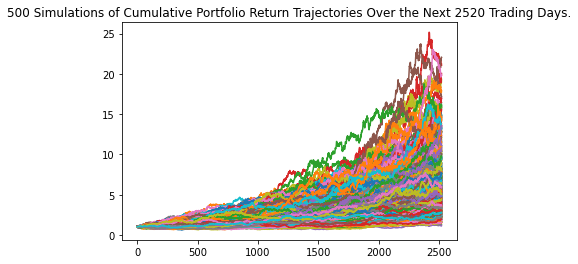

In [153]:
#  10-year Monte Carlo simulation visualization

MC_10year_sim_line_plot = MC_10_Year_Simulation.plot_simulation()

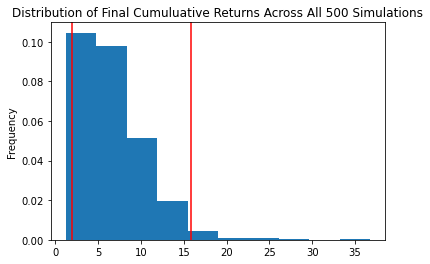

In [130]:
# The probability distribution visualization of the 10-year Monte Carlo simulation 
# by a histogram
MC_10year_sim_dist_plot = MC_10_Year_Simulation.plot_distribution()

In [132]:
# Summary statistics for the 10-year Monte Carlo simulation results

MC_10year_summary_statistics = MC_10_Year_Simulation.summarize_cumulative_return()

# The 10-year Monte Carlo summary statistics
print(MC_10year_summary_statistics)


count           500.000000
mean              6.792113
std               4.044967
min               1.207160
25%               3.890686
50%               5.743624
75%               8.892419
max              36.766725
95% CI Lower      1.939505
95% CI Upper     15.884543
Name: 2520, dtype: float64


### Answer the following questions:

#### Question 1: 
    Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that was generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# The current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the Stock and Bond Portion of the members portfolio is : ${total_stocks_bonds}")

In [156]:
# The lower and upper `95%` confidence intervals are used to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_10year_summary_statistics["95% CI Lower"] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_10year_summary_statistics["95% CI Upper"] * total_stocks_bonds

# The result of the calculations
print(f"\nAnswer 1 :")
print(f"\nThere is a 95% chance that the  incurrent value of ${total_stocks_bonds} \nin the portfolio"
  f" over the next 30 years will end \nwithin in the range of"
  f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.\n")


Answer 1 :

There is a 95% chance that the  incurrent value of $74034.3 
in the portfolio over the next 30 years will end 
within in the range of $ 143589.87 and $ 1176001.00.



#### Question 2: 
    Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer 2**

    * Given a 95% confidence interval, the upper and lower bounds of the cumulative returns for the portfolio for 30 year similation beats the the upper and lower bounds of the cumulative returns for the portfolio for 10 year
    * So the Answer is **NO** given the current portfolio value for the credit Union Memeber will do better in 30 year than in 10 years even if we give more weight to stocks than bonds.